# Discovering the top nouns, verbs, entities and text similarity within the spoken lines of Earth’s Mightiest Heroes i.e from Avengers_Endgame script

Using spaCy, an NLP Python open source library designed to help us process and understand volumes of text, I analyzed the script of the movie to investigate the following concepts:

- scraped the movie script from https://transcripts.fandom.com/wiki/Avengers:_Endgame using scrapy
- Overall top 10 verbs, nouns, adverbs, pronouns and adjectives from the film.
- Top verbs and nouns spoke by a particular character.
- Top named entities from the film.
- The similarity between the spoken lines of each character pair, e.g., the similarity between Thor’s and Thanos’ lines

In [44]:
import pandas as pd
import spacy
nlp=spacy.load("en_core_web_md")
import os
import numpy as np
import re

**Reading and ceaning the scraped Transcript**

In [90]:
text=pd.read_csv('avengers_endgame.csv')

In [91]:
text.tail(10)

,Column 1
1586,SAM WILSON: [seeing elderly Steve's wedding ri...
1587,"(OLD) STEVE ROGERS: [smiling] No. No, I don't ..."
1588,"[In the final scenes, Steve has time traveled ..."
1589,The Precursors in ‘Jedi: Fallen Order’ Who Gam...
1590,Avengers: Age of Ultron
1591,Blue's Clues
1592,Captain America: Civil War
1593,List of Movies
1594,Loading...
1595,Win a Trip to C2E2 in the Fanta Fan Art Challenge


In [99]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588 entries, 0 to 1587
Data columns (total 1 columns):
Column 1    1588 non-null object
dtypes: object(1)
memory usage: 12.5+ KB


In [100]:
# removing last few unnecessary lines
text=text.iloc[:1588]

In [101]:
# cleaning data without subjects
def clean_data_without_subject(text):
    text=text.replace(regex=r'\[.*?\]',value='')
    text=text.replace(regex=r'\(.*?\)',value='')
    text = text.replace(regex=r'.*:', value='')
#     text=text.replace(regex=r'<dd>',value='')
#     text=text.replace(regex=r'<b>',value='')
#     text=text.replace(regex=r'<i>',value='')
#     text=text.replace(regex=r'</dd>',value='')
#     text=text.replace(regex=r'</b>',value='')
#     text=text.replace(regex=r'</i>',value='')
#     text=text.replace(regex=r'<\n>',value='')
#     text=text.replace(regex=r'\n',value='')
#     text=text.replace(regex=r'\[.*?\]',value='')
#     text=text.replace(regex=r'\(.*?\)',value='')
#     text.replace('""', '', inplace=True)
#     text.dropna(subset=['Column 1'], inplace=True)
#     text.reset_index(inplace=True,drop=True)
    return text

In [102]:
# cleaning data with subjects
def clean_data_with_subject(text):
    text=text.replace(regex=r'\[.*?\]',value='')
    text=text.replace(regex=r'\(.*?\)',value='')
#     text = text.replace(regex=r'.*:', value='')
#     text=text.replace(regex=r'<dd>',value='')
#     text=text.replace(regex=r'<b>',value='')
#     text=text.replace(regex=r'<i>',value='')
#     text=text.replace(regex=r'</dd>',value='')
#     text=text.replace(regex=r'</b>',value='')
#     text=text.replace(regex=r'</i>',value='')
#     text=text.replace(regex=r'<\n>',value='')
#     text=text.replace(regex=r'\n',value='')
#     text=text.replace(regex=r'\[.*?\]',value='')
#     text=text.replace(regex=r'\(.*?\)',value='')
#     text.replace('""', '', inplace=True)
#     text.dropna(subset=['Column 1'], inplace=True)
#     text.reset_index(inplace=True,drop=True)
    return text

In [103]:
# saving file with subjects
with_subject=clean_data_with_subject(text)
np.savetxt('cleaned_script_subject.txt',X=with_subject,encoding='utf-8',fmt='%s',newline='\n\n')

without_subject=clean_data_without_subject(text)
# saving file with without subjects
np.savetxt('cleaned_script_without_subject.txt',X=without_subject,encoding='utf-8',fmt='%s',newline='\n\n')

**opening a cleaned_script_without_subject file and identifying total number of VERB, PRON, ADV,ADJ,NOUN**

In [107]:
with open('cleaned_script_without_subject.txt', 'r',encoding='utf-8') as file:
    data = file.read()
    
doc=nlp(data)

In [191]:
def produce_plot(result, fig_name, kind):
    """Save plot of result
    Parameters:
    result: data to draw
    fig_name: figure name
    kind: type of data used to plot
    """
    
    plt.figure(figsize=(8,6))
    plt.bar(["\"{}\"".format(i[0]) for i in result], [i[1] for i in result],color='purple')
    plt.ylabel('total')
    plt.xlabel('term')
    plt.xticks(rotation=45, fontsize=12)
    plt.title("Top {}{} ({})".format(kind, 's', fig_name.title()))
    plt.subplots_adjust(bottom=0.30)
    plt.show()
    plt.close()

In [192]:
def top_pos(doc, pos, n, fig_name=""):
    """Finds the top n spaCy pos

    Parameters:
    doc: spaCy's doc
    pos: pos we are interesting in finding; one of "VERB", "NOUN", "ADJ", "ADP","PRON" or "ADV"
    n: how many pos
    fig_name: name of the plot
    """
    
    pos_count = {}
    for token in doc:
        # ignore stop words
        if token.is_stop:
            continue

        if token.pos_== pos:
            if token.lemma_ in pos_count:
                pos_count[token.lemma_] += 1
            else:
                pos_count[token.lemma_] = 1

    # sort by values, but before get only those keys where value > 1;
    # I want lemmas that appear more than one
    # lastly, get the first n results
    result = sorted({k: v for (k, v) in pos_count.items() if v > 1}.items(),
                    key=lambda kv: kv[1], reverse=True)[:n]

    print("top 10 {} {}".format(pos, result))
    produce_plot(result, fig_name, pos)

top 10 NOUN [('time', 58), ('stone', 50), ('thing', 30), ('guy', 29), ('way', 28), ('year', 24), ('people', 13), ('future', 13), ('lot', 12), ('life', 12)]


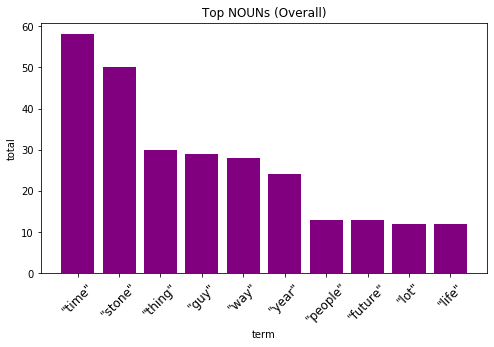

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline
top_pos(doc, 'NOUN', 10, "overall")

top 10 ADJ [('good', 33), ('right', 28), ('little', 17), ('okay', 14), ('bad', 13), ('great', 10), ('new', 9), ('fine', 9), ('dead', 8), ('sorry', 8)]


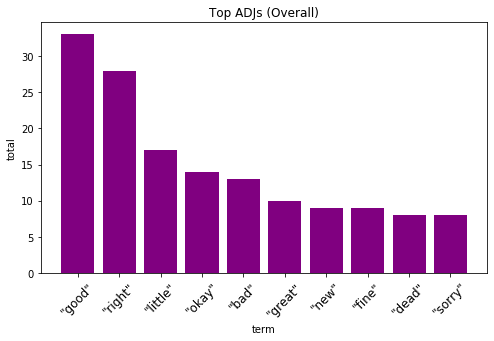

In [194]:
top_pos(doc, 'ADJ', 10, "overall")

top 10 PRON [('everybody', 8), ('anybody', 3), ('somebody', 3)]


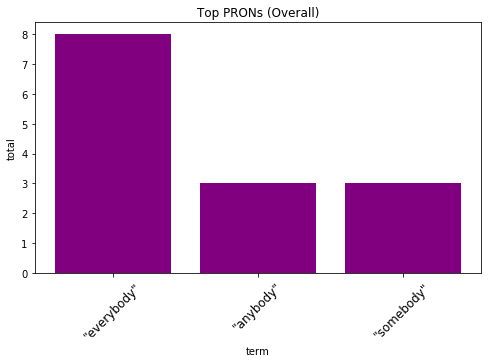

In [195]:
top_pos(doc, 'PRON', 10, "overall")

top 10 VERB [('know', 110), ('go', 90), ('get', 67), ('come', 44), ('think', 39), ('look', 37), ('need', 30), ('tell', 28), ('let', 27), ('want', 27)]


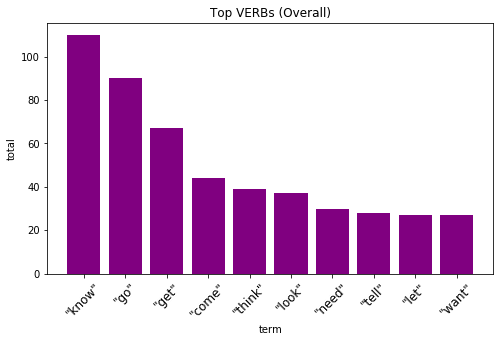

In [196]:
top_pos(doc, 'VERB', 10, "overall")

top 10 ADV [('right', 29), ('maybe', 12), ('ago', 11), ('probably', 7), ('course', 7), ('exactly', 6), ('better', 6), ('actually', 6), ('long', 6), ('pretty', 5)]


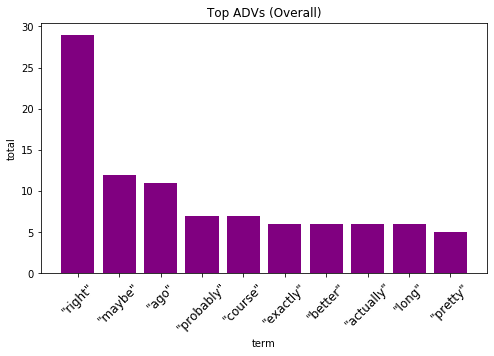

In [197]:
top_pos(doc, 'ADV', 10, "overall")

top 10 ADP [('inside', 3), ('outside', 2)]


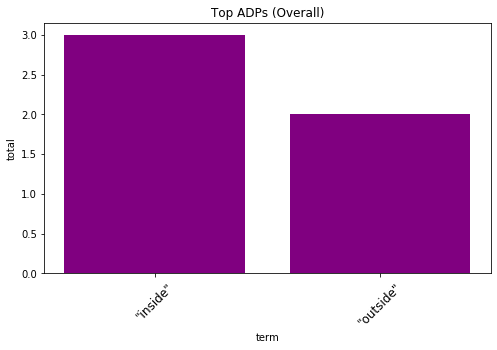

In [202]:
top_pos(doc, 'ADP', 10, "overall")

**opening a cleaned_script_with_subject file and identifying :**
- **Top verbs and nouns spoke by a particular character.**

- **Top named entities from the film.**

**In order to find out the name of the super Heroes we can use NER using Spacy but here I will use other method**

In [210]:
with_subject['characters']=with_subject['Column 1'].apply(lambda x : x.lower().split(':')[0])

In [212]:
with_subject.characters.unique()

array(['', 'clint barton', 'lila barton', 'cooper barton', 'laura barton',
       'nathaniel barton', 'nebula', 'tony stark', 'steve rogers',
       'pepper potts', 'james rhodes', 'natasha romanoff', 'rocket',
       'rhodey', 'carol danvers', 'bruce banner', 'thor', 'thanos',
       'natasha romanonff', 'five', 'years', 'later', 'joe russo',
       'jim starlin', 'scott lang', 'cassie lang', 'okoye',
       'morgan stark', 'girl', 'f.r.i.d.a.y', 'teen scott lang',
       'old scott lang', 'valkyrie',
       ' boys! oh my god! its so to see you!  come here, you little rascal!',
       'korg', 'thug #1', 'akihiko', 'ronin', 'natasha',
       'the ancient one ',
       '[nebula walks out of the ship, apparently having directed it to its next destination.',
       'gamora ', 'nebula ', 'thanos ', 'rhodey ', 'loki ', 'tony stark ',
       'natasha romanoff ', 'sitwell ', 'clint barton ', 'steve rogers ',
       'thor ', 'hulk ', 'rumlow ', 'alexander pierce ',
       'alexander peirce ', 

In [228]:
def top_entities(doc, n, fig_name=""):
    """Finds the top n spaCy entities
    Parameters:
    doc: spaCy's doc
    n: how many entities
    fig_name: name of the plot
    """
    
    entities = {}
    # named entities
    for ent in doc.ents:
        # Print the entity text and its label
        if ent.text in entities:
            entities[ent.text] += 1
        else:
            entities[ent.text] = 1
    result = sorted(entities.items(), key=lambda kv: kv[1], reverse=True)[:n]
    print("top 10 entities {}".format(result))

    plt.figure(figsize=(8,6))
    plt.bar(["\"{}\"".format(i[0]) for i in result], [i[1] for i in result],color='purple')
    plt.ylabel('total')
    plt.xlabel('named entity')
    plt.xticks(rotation='vertical', fontsize=10)
    plt.title("Top {} named entities ({})".format(n, fig_name.title()))
    plt.subplots_adjust(bottom=0.40)
    plt.show()
    plt.close()

In [231]:
def character_results(nlp):
    """Creates a doc per character using their lines,
    and calculate the top 10 pos and entities
    Parameters:
    nlp: spaCy's nlp
    Returns:
    character:doc dict
   """
    # these are the characters I want to analyze
    subjects = ['clint barton','nebula','tony stark','steve rogers','rocket',
       'rhodey','carol danvers','bruce banner','thor','thanos','natasha romanoff','scott lang','peter parker','gamora']
    # create a map of character:doc
    subjects_docs = {}

    for subject in subjects:
        with open('cleaned_script_subject.txt', 'r',encoding='utf-8') as file:
            # this list will contain all the lines produced by the subject
            lines_with_subject = []
            for line in file:
                if line.lower().startswith(subject):
                    # remove the subject, e.g. Thanos :.... before appending
                    lines_with_subject.append(re.sub(r'.*:', '', line.lower()))
        # create a doc using a long string with line break between line
        # made from all the lines spoken by the subject
        doc = nlp('\n'.join(lines_with_subject))
        top_pos(doc, 'VERB', 10, subject)
        top_pos(doc, 'NOUN', 10, subject)
        top_pos(doc, 'ADJ', 10, subject)
        top_pos(doc, 'ADV', 10, subject)
        top_entities(doc, 10, subject)
        subjects_docs[subject] = doc

    return subjects_docs

top 10 VERB [('know', 4), ('get', 3), ('go', 2), ('let', 2), ('work', 2), ('mean', 2), ('pick', 2), ('want', 2), ('undo', 2), ('talk', 2)]


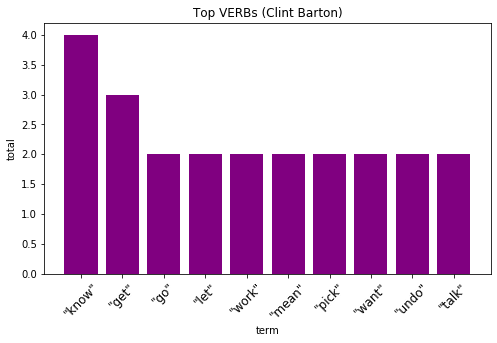

top 10 NOUN [('babe', 3), ('job', 2), ('honey', 2), ('boy', 2), ('target', 2), ('way', 2)]


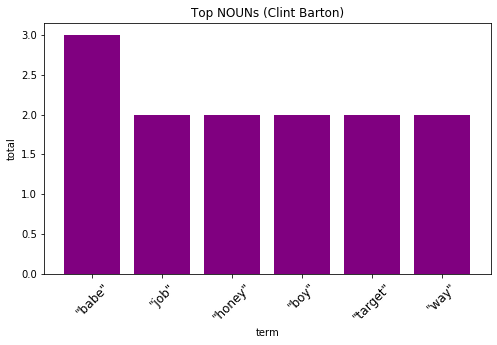

top 10 ADJ [('good', 2)]


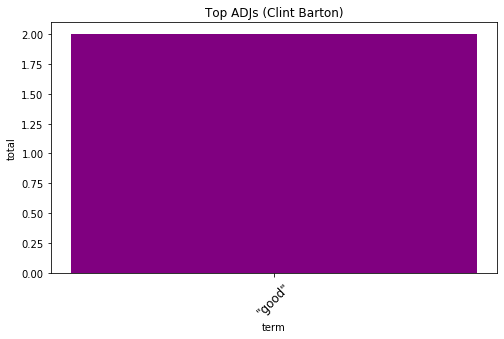

top 10 ADV [('maybe', 2)]


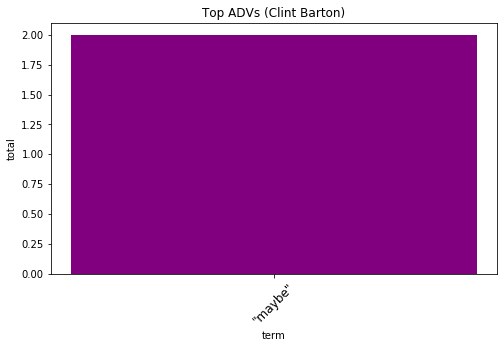

top 10 entities [('cap', 2), ('two', 1), ('laura', 1), ('lila', 1), ('budapest', 1), ('jesus', 1)]


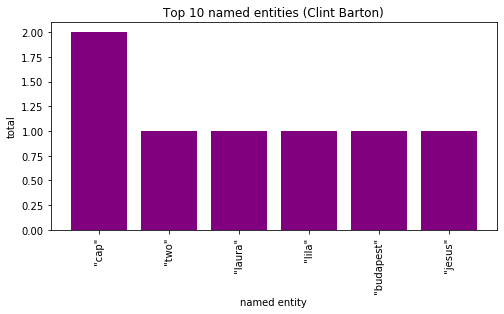

top 10 VERB [('know', 6), ('come', 4), ('let', 3), ('look', 3), ('try', 2)]


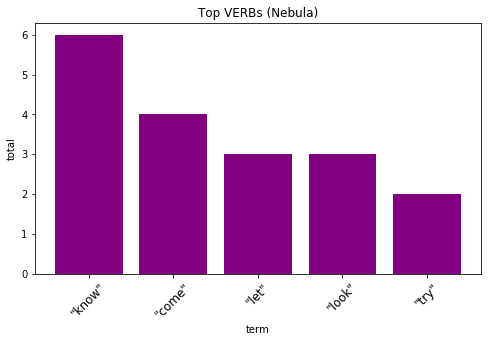

top 10 NOUN [('father', 5), ('stone', 4), ('thing', 2), ('liar', 2), ('sister', 2), ('cover', 2), ('one', 2)]


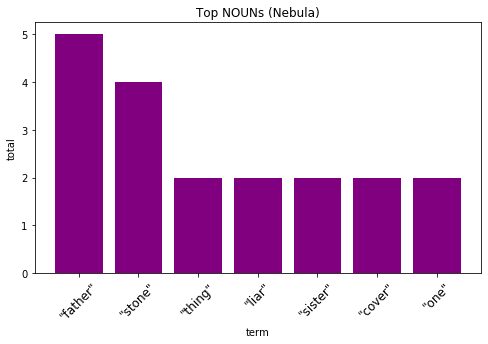

top 10 ADJ []


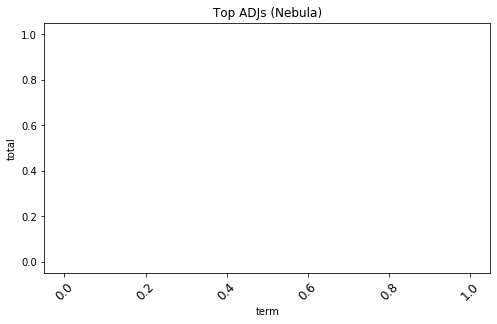

top 10 ADV []


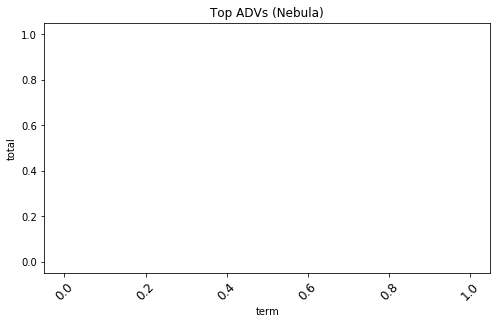

top 10 entities [('thanos', 3), ('one', 2), ('2014', 2), ('wrra', 1), ('3', 1), ('2', 1), ('1', 1), ('vormir', 1), ('barton', 1), ('romanoff', 1)]


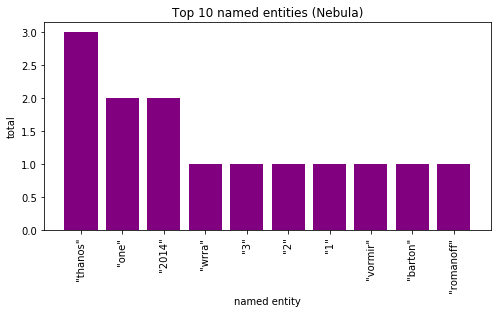

top 10 VERB [('know', 21), ('get', 20), ('go', 14), ('think', 11), ('need', 9), ('come', 9), ('look', 8), ('say', 7), ('hope', 6), ('stop', 6)]


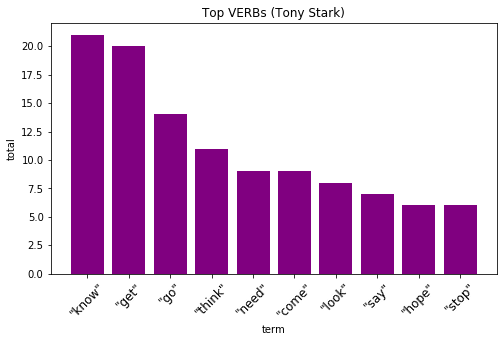

top 10 NOUN [('time', 14), ('way', 10), ('thing', 7), ('year', 5), ('buddy', 5), ('bed', 4), ('mind', 4), ('man', 4), ('today', 3), ('suit', 3)]


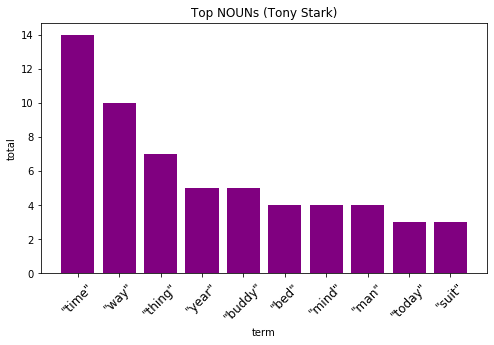

top 10 ADJ [('right', 9), ('good', 7), ('little', 5), ('new', 3), ('fine', 3), ('well', 2), ('bad', 2), ('exact', 2), ('great', 2), ('high', 2)]


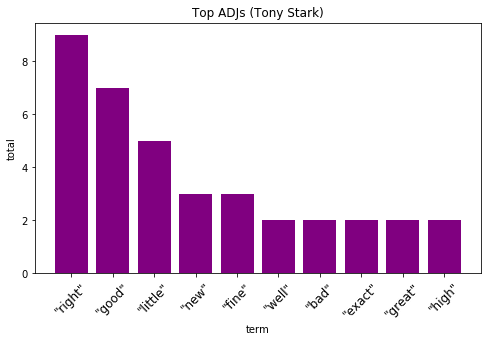

top 10 ADV [('right', 6), ('honestly', 3), ('actually', 3), ('probably', 2), ('exactly', 2), ('maybe', 2), ('ago', 2), ('better', 2)]


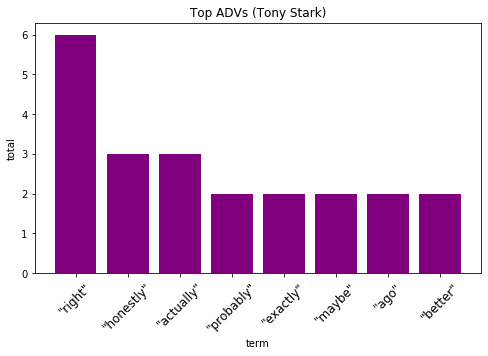

top 10 entities [('cap', 6), ('one', 5), ('second', 3), ('lang', 3), ('potts', 2), ('today', 2), ('tomorrow', 2), ('morgoona', 2), ('scott', 2), ('six', 2)]


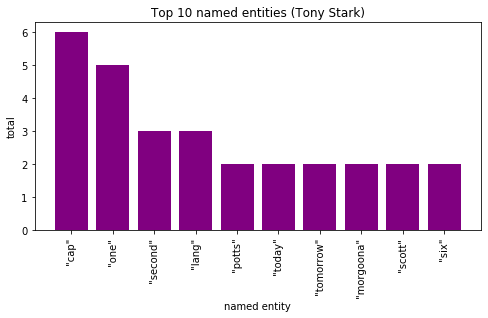

top 10 VERB [('know', 15), ('go', 11), ('get', 7), ('wait', 6), ('lose', 5), ('need', 5), ('work', 3), ('talk', 3), ('got', 3), ('try', 3)]


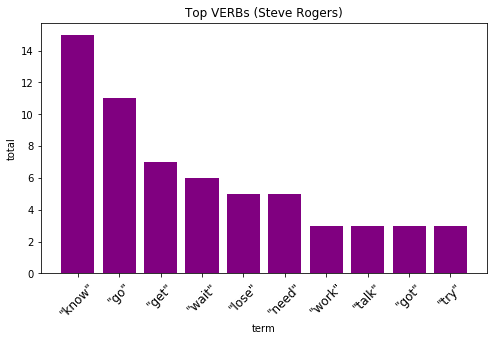

top 10 NOUN [('stone', 9), ('baby', 3), ('life', 3), ('way', 3), ('fight', 2), ('year', 2), ('friend', 2), ('chance', 2), ('thing', 2), ('plan', 2)]


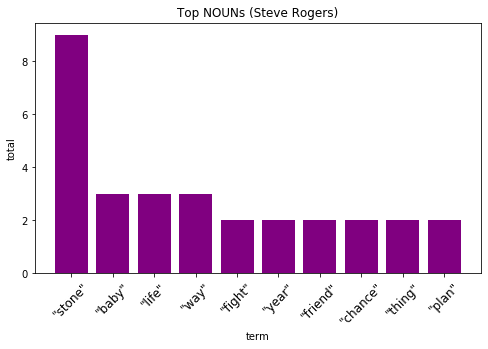

top 10 ADJ [('okay', 4), ('good', 2)]


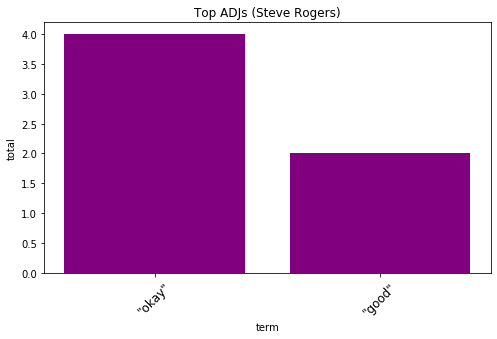

top 10 ADV [('right', 4)]


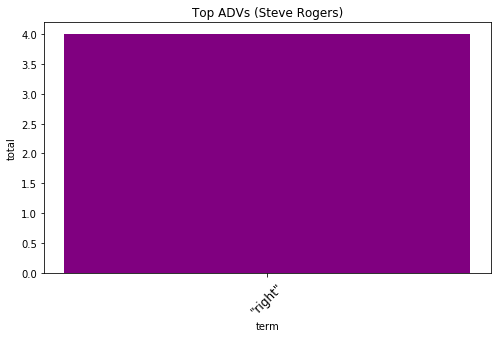

top 10 entities [('tony', 8), ('one', 3), ('scott', 2), ('six', 2), ('thor', 2), ('bruce', 2), ('i.\n\n tony', 1), ('three weeks', 1), ("'45", 1), ('70 years later', 1)]


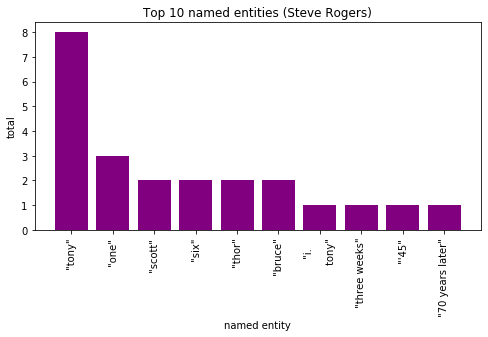

top 10 VERB [('go', 10), ('come', 5), ('get', 5), ('look', 4), ('think', 3), ('wanna', 3), ('lose', 3), ('breathe', 3), ('snap', 2), ('space', 2)]


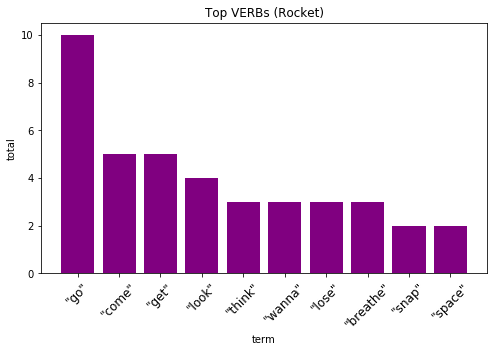

top 10 NOUN [('stone', 3), ('finger', 2), ('earth', 2), ('power', 2), ('planet', 2), ('ship', 2), ('point', 2), ('puppy', 2), ('space', 2), ('thing', 2)]


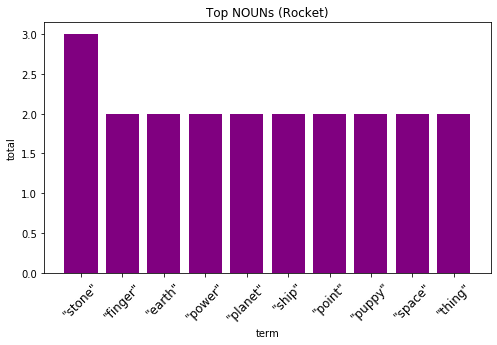

top 10 ADJ [('good', 6), ('right', 2)]


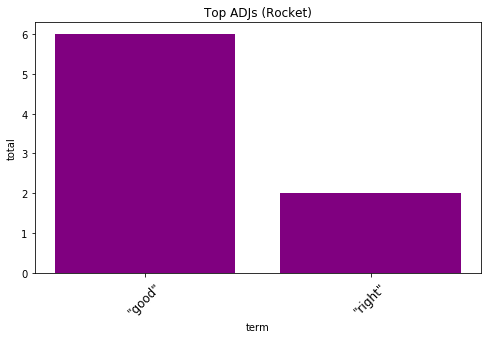

top 10 ADV [('right', 3), ('pretty', 2)]


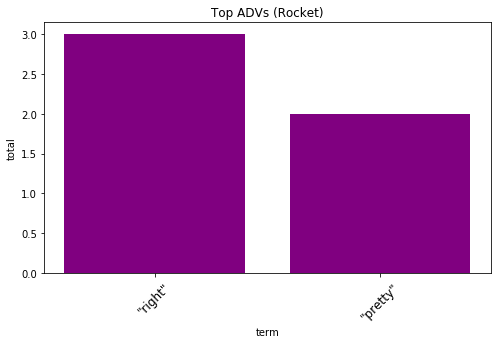

top 10 entities [('morag', 2), ('quill', 2), ('thanos', 1), ('zero', 1), ('two days ago', 1), ('avenger highness', 1), ('one', 1), ('today', 1), ('thor', 1), ('three', 1)]


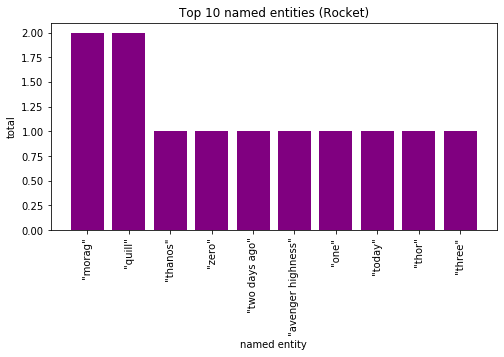

top 10 VERB [('know', 4), ('wait', 4), ('sit', 3), ('look', 3), ('get', 3), ('find', 3), ('go', 2), ('tell', 2), ('let', 2), ('come', 2)]


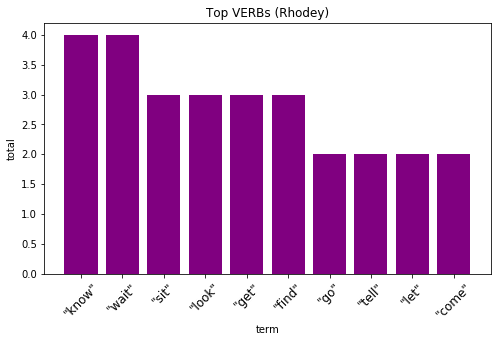

top 10 NOUN [('time', 8), ('stone', 6), ('guy', 4), ('power', 3), ('canopy', 3), ('place', 2), ('bunch', 2), ('man', 2), ('quill', 2)]


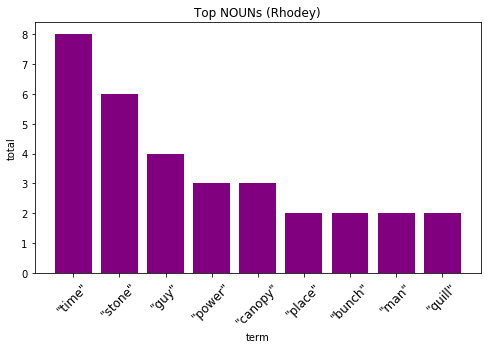

top 10 ADJ []


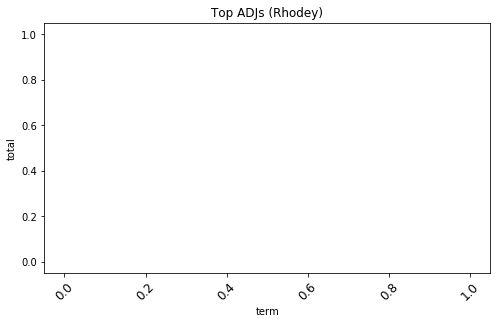

top 10 ADV [('right', 3)]


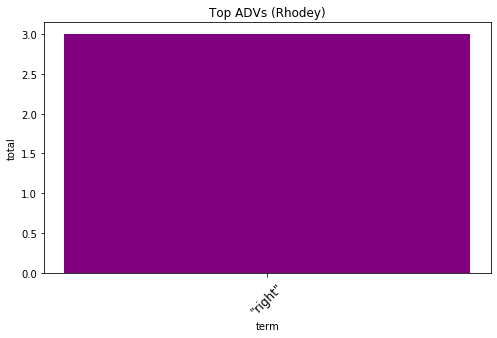

top 10 entities [('tony', 4), ('bruce', 1), ('the day', 1), ('thanos', 1), ('mexico', 1), ('barton', 1), ('the last few years', 1), ('second', 1), ('timecop', 1), ('bill', 1)]


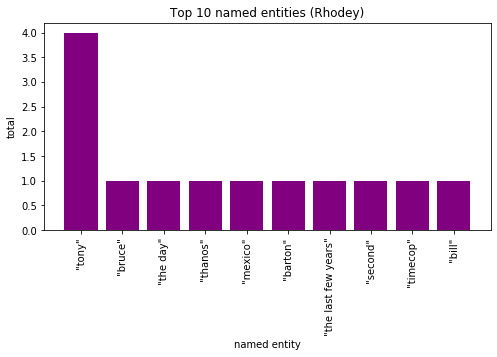

top 10 VERB [('bring', 2), ('happen', 2)]


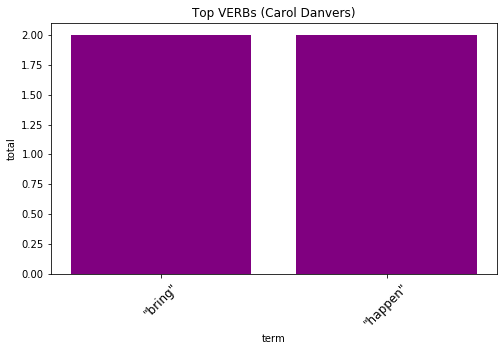

top 10 NOUN [('guy', 2), ('lot', 2), ('planet', 2)]


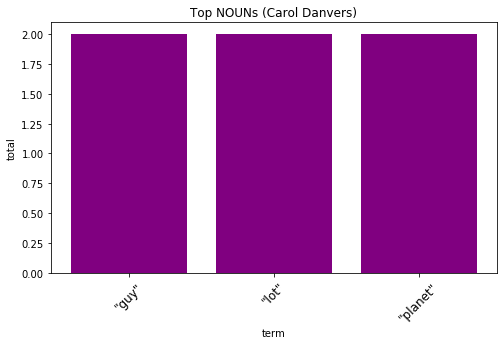

top 10 ADJ []


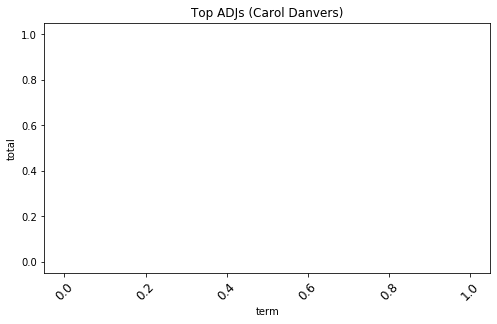

top 10 ADV []


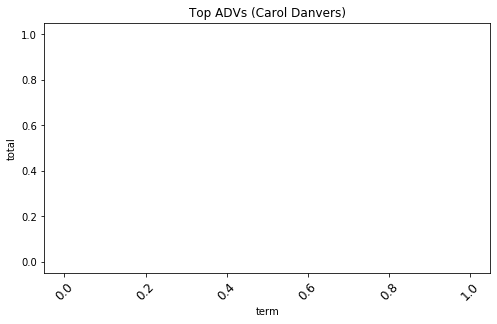

top 10 entities [('xorrian', 1), ('earth', 1), ('thousands', 1), ('peter parker', 1)]


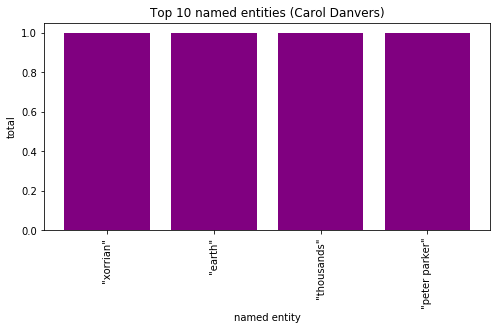

top 10 VERB [('go', 9), ('know', 8), ('come', 6), ('lose', 6), ('feel', 5), ('try', 5), ('need', 5), ('kill', 4), ('get', 3), ('look', 3)]


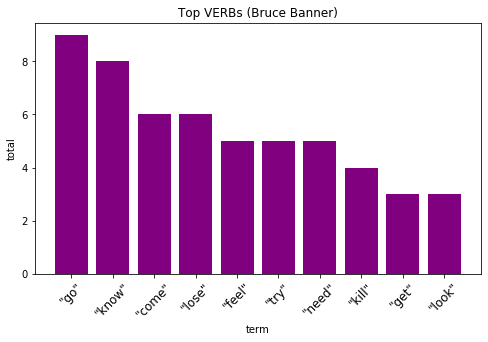

top 10 NOUN [('time', 9), ('stone', 6), ('past', 4), ('travel', 3), ('guy', 3), ('future', 3), ('year', 2), ('gamma', 2), ('kid', 2), ('joke', 2)]


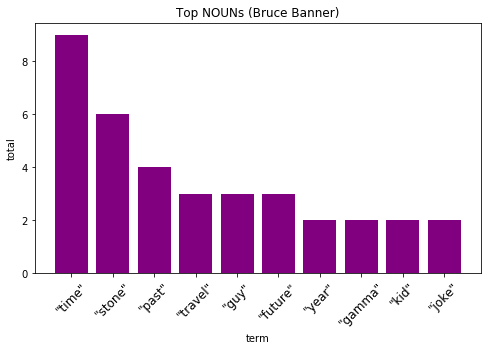

top 10 ADJ [('bad', 7), ('little', 4), ('right', 3), ('strange', 3), ('good', 2), ('great', 2), ('careful', 2), ('okay', 2)]


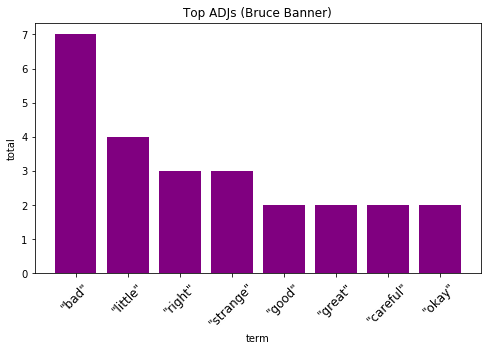

top 10 ADV [('ago', 2), ('away', 2)]


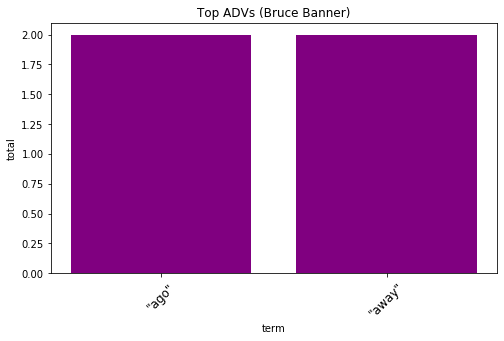

top 10 entities [('one', 3), ('scott', 3), ('three', 3), ('first', 2), ('3', 2), ('2', 2), ('1', 2), ('thor', 2), ('thanos', 2), ('clint', 2)]


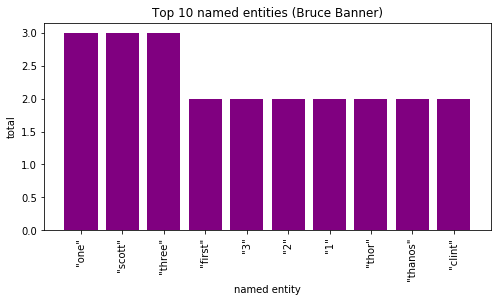

top 10 VERB [('know', 12), ('go', 6), ('let', 5), ('think', 4), ('stop', 4), ('kill', 3), ('try', 3), ('like', 2), ('hide', 2), ('remember', 2)]


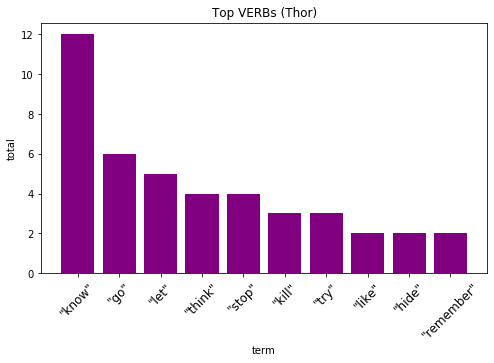

top 10 NOUN [('time', 6), ('stone', 5), ('guy', 4), ('thing', 4), ('head', 3), ('idea', 3), ('future', 3), ('cable', 2), ('week', 2), ('father', 2)]


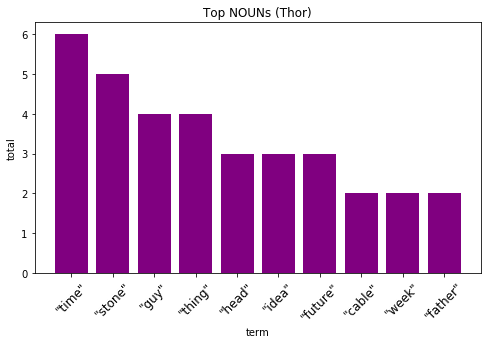

top 10 ADJ [('right', 6), ('fine', 4), ('okay', 4), ('little', 3), ('dead', 3), ('good', 3), ('sorry', 2)]


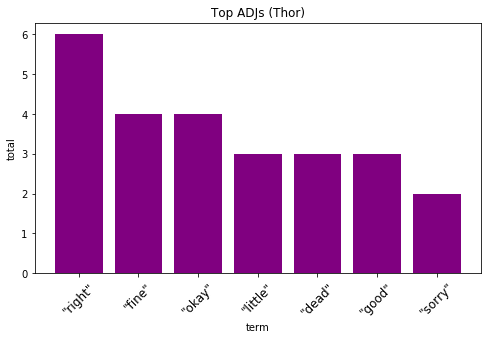

top 10 ADV [('course', 5), ('ago', 2), ('totally', 2), ('long', 2)]


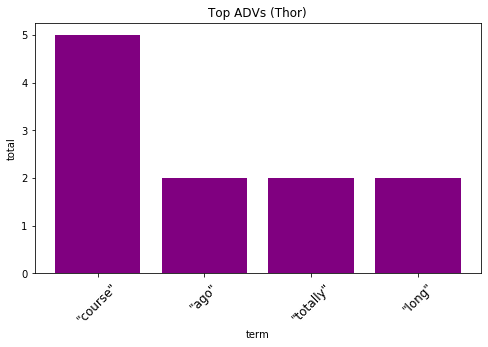

top 10 entities [('jane', 4), ('noobmaster', 2), ('asgardians', 2), ('first', 2), ('cinemax', 1), ('about two weeks ago', 1), ('thor', 1), ('weeks', 1), ('korg', 1), ('thanos', 1)]


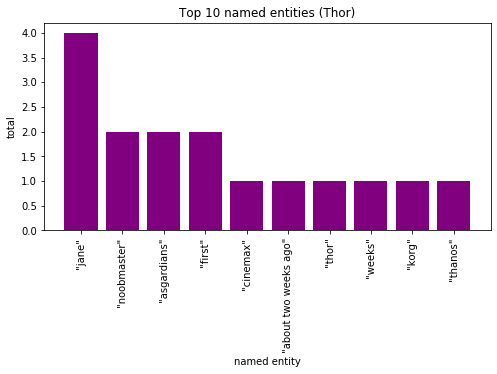

top 10 VERB [('go', 4), ('know', 4), ('bring', 3), ('reduce', 2), ('destroy', 2), ('kill', 2), ('thank', 2), ('treat', 2), ('will', 2), ('try', 2)]


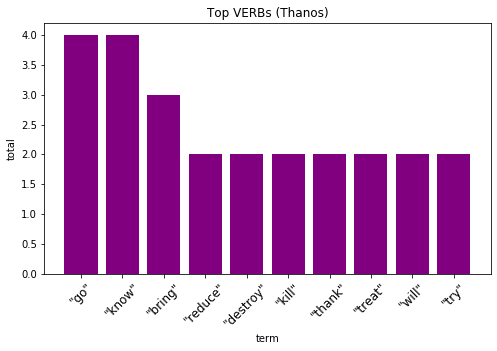

top 10 NOUN [('stone', 8), ('daughter', 3), ('memory', 3), ('nebula', 3), ('atom', 2), ('work', 2), ('ship', 2), ('duplicate', 2), ('time', 2), ('destiny', 2)]


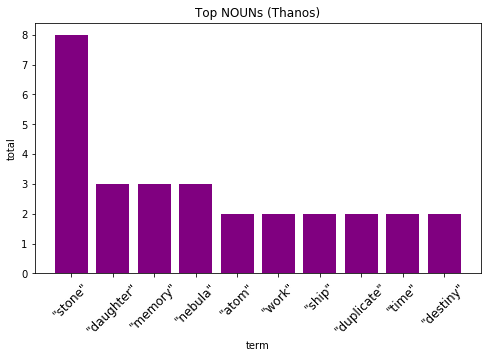

top 10 ADJ [('inevitable', 3), ('grateful', 2), ('impossible', 2)]


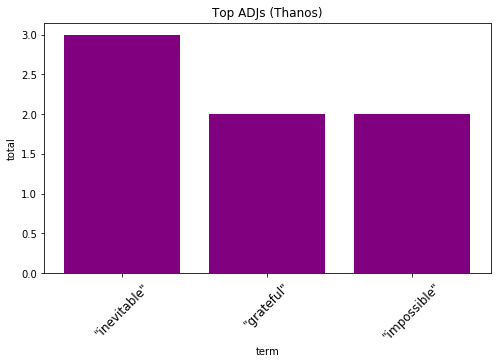

top 10 ADV [('nearly', 2), ('harshly', 2)]


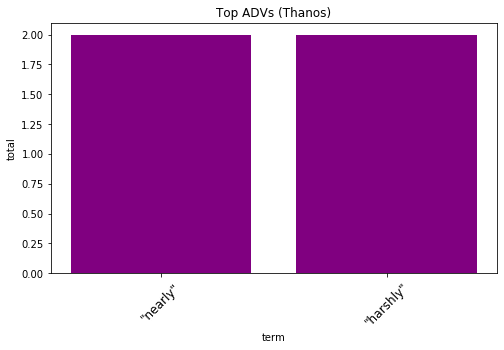

top 10 entities [('ronan', 2), ('half', 2), ('two', 1), ('morag', 1), ('all my years', 1)]


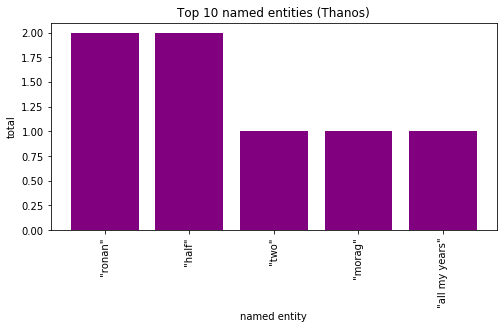

top 10 VERB [('go', 7), ('try', 5), ('work', 3), ('look', 3), ('live', 2), ('know', 2), ('come', 2), ('find', 2), ('tell', 2), ('bring', 2)]


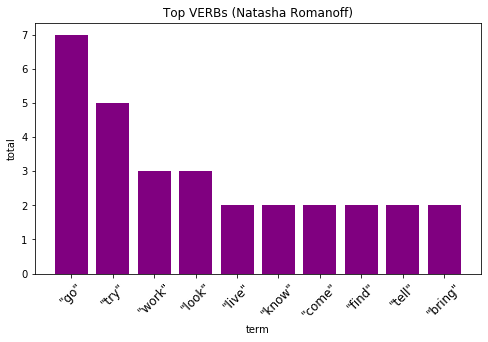

top 10 NOUN [('stone', 5), ('year', 3), ('people', 3), ('guy', 3), ('chance', 2), ('family', 2), ('time', 2), ('thing', 2), ('chop', 2)]


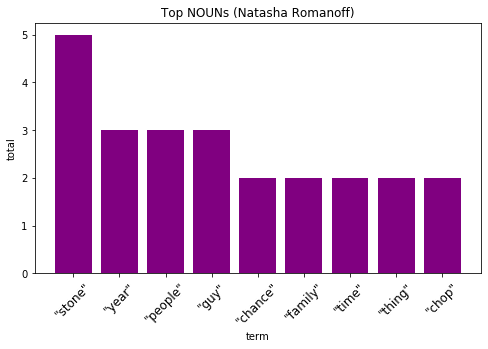

top 10 ADJ [('well', 2), ('right', 2)]


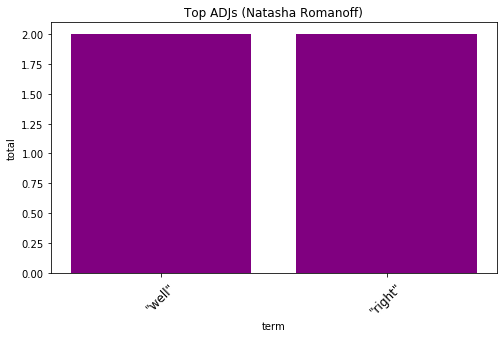

top 10 ADV []


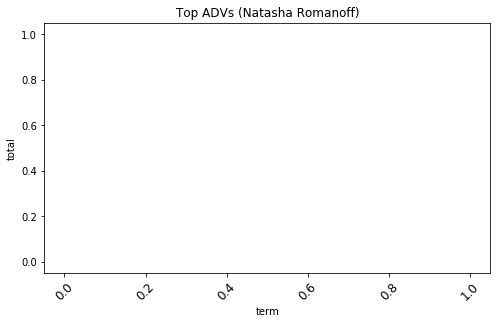

top 10 entities [('thanos', 2), ('new york', 2), ('fifty percent', 1), ('steve', 1), ('carol', 1), ('next month', 1), ('hudson', 1), ('a very long five years', 1), ('tony', 1), ('bruce', 1)]


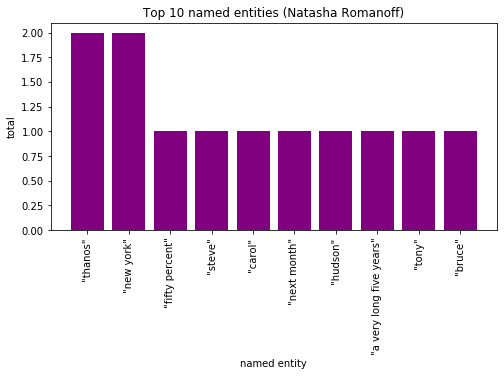

top 10 VERB [('get', 9), ('know', 8), ('go', 8), ('talk', 5), ('think', 5), ('mean', 4), ('want', 4), ('happen', 3), ('excuse', 3), ('say', 3)]


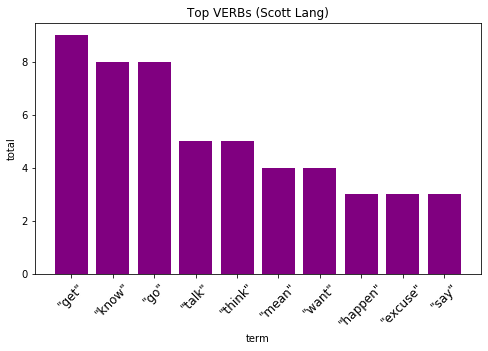

top 10 NOUN [('time', 12), ('guy', 5), ('realm', 5), ('stone', 5), ('machine', 4), ('hell', 3), ('way', 3), ('heist', 3), ('year', 2), ('rule', 2)]


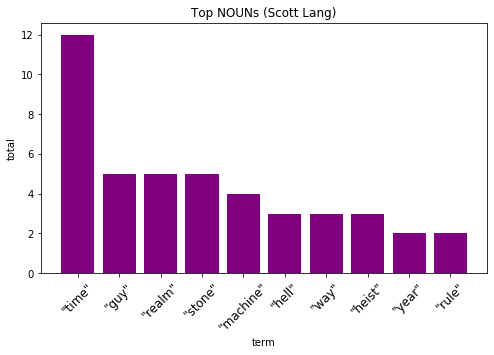

top 10 ADJ [('quantum', 6), ('big', 3), ('crazy', 2), ('easy', 2), ('dead', 2)]


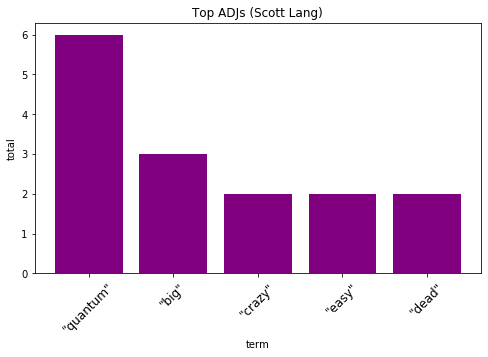

top 10 ADV [('home', 2), ('ago', 2), ('right', 2)]


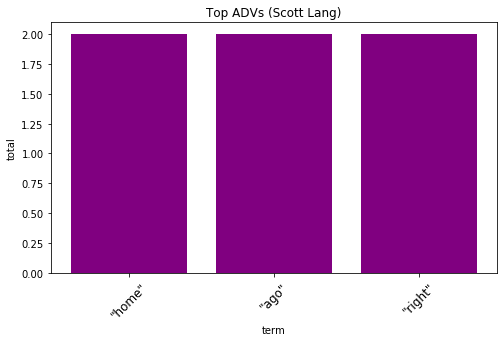

top 10 entities [('one', 5), ('cassie', 3), ('america', 2), ('six', 2), ('scott lang', 1), ('a few years ago', 1), ('germany', 1), ('five years ago', 1), ('five hours', 1), ('hank pym', 1)]


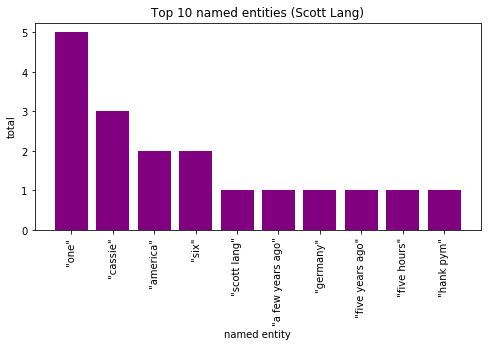

top 10 VERB [('get', 4), ('go', 3), ('win', 3), ('help', 2)]


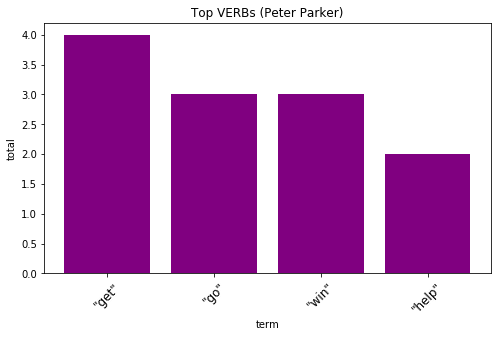

top 10 NOUN []


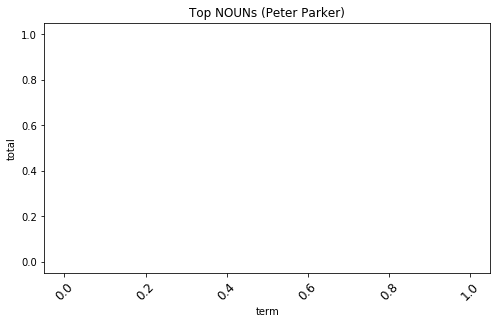

top 10 ADJ [('nice', 2)]


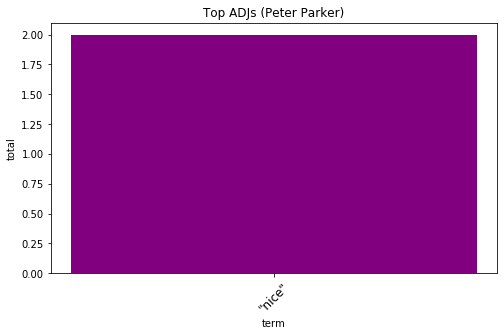

top 10 ADV []


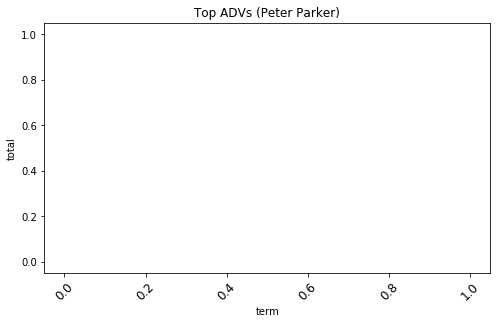

top 10 entities [('stark', 4), ('five years', 1), ('peter parker', 1), ('peter', 1), ('tony', 1)]


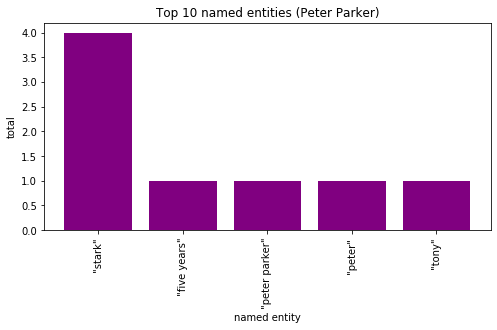

top 10 VERB []


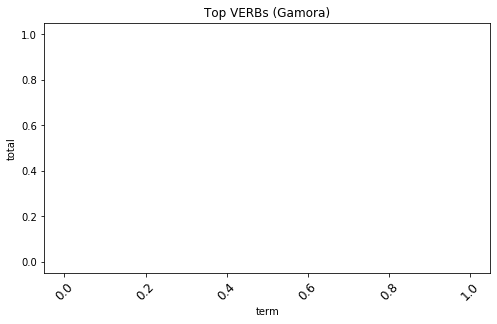

top 10 NOUN [('stone', 3), ('nebula', 2)]


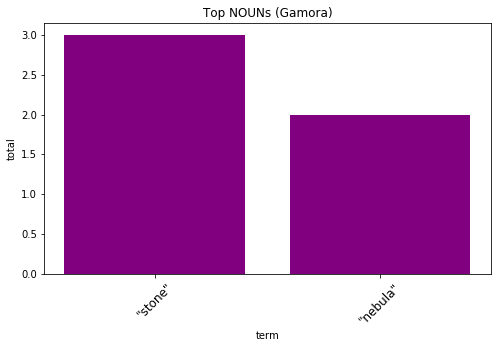

top 10 ADJ []


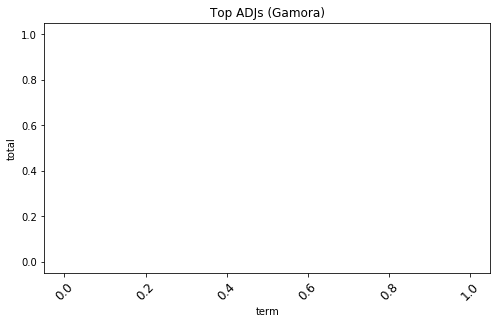

top 10 ADV []


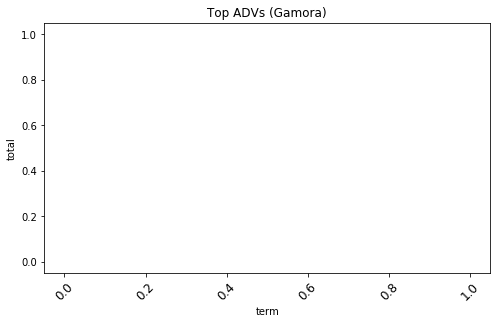

top 10 entities [('morag', 1), ('six', 1), ('two', 1)]


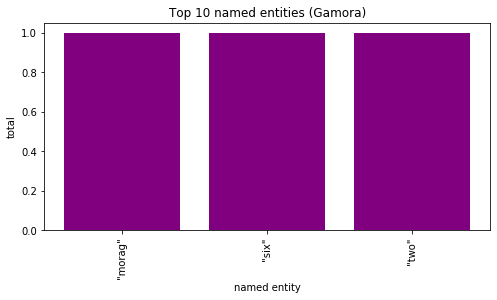

In [232]:
subjects_docs = character_results(nlp)

In [260]:
import itertools
def docs_similarities(subjects_docs):
    # create a square ndarray of len(subjects_docs) filled with 1's
    similarities_matrix = np.full((len(subjects_docs), len(subjects_docs)), fill_value=1.0)

    # for every possible combination pair
    # e.g. (Tony, thor), (Tony, Rocket) and so on
    for a, b in itertools.product(enumerate(subjects_docs), repeat=2):
        similarity_score = subjects_docs[a[1]].similarity(subjects_docs[b[1]])
        print("Similarity between {} and {} docs is {}".format(a[1], b[1], similarity_score))
        similarities_matrix[a[0], b[0]] = similarity_score

    
    plt.matshow(similarities_matrix, interpolation='nearest')
    plt.yticks(range(len(subjects_docs)), subjects_docs.keys())
    plt.xticks(range(len(subjects_docs)), subjects_docs.keys(), rotation='vertical')
    plt.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
    plt.colorbar()
    plt.title("Character's Corpus Similarity Matrix")
    plt.show()
    plt.close()

Similarity between clint barton and clint barton docs is 1.0
Similarity between clint barton and nebula docs is 0.9857211997754223
Similarity between clint barton and tony stark docs is 0.9907854093772948
Similarity between clint barton and steve rogers docs is 0.9892749924241785
Similarity between clint barton and rocket docs is 0.9927507009744414
Similarity between clint barton and rhodey docs is 0.9853678412994757
Similarity between clint barton and carol danvers docs is 0.9797419593134957
Similarity between clint barton and bruce banner docs is 0.990675230904786
Similarity between clint barton and thor docs is 0.9916540566125552
Similarity between clint barton and thanos docs is 0.9789811220753628
Similarity between clint barton and natasha romanoff docs is 0.9900972740810827
Similarity between clint barton and scott lang docs is 0.9932699995896314
Similarity between clint barton and peter parker docs is 0.9882563665556408
Similarity between clint barton and gamora docs is 0.979387

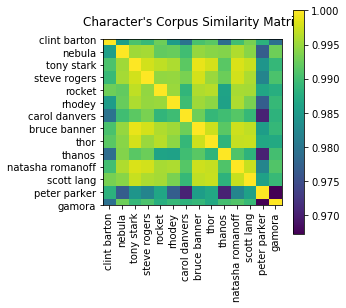

In [261]:
docs_similarities(subjects_docs)